In [ ]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
#Read in cleaned dataset.
file_path=path+ "fraud_hashtag.csv"
data_fraud=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})
file_path=path+ "qa_hashtag.csv"
data_qa=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})
file_path=path+ "anti_hashtag.csv"
data_anti=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})

In [ ]:


def clean_text_keep_hashtags(text):
    # Remove all except #
    text = text.lower()
    punctuation_except_hash = ''.join([p for p in string.punctuation if p != '#'])
    translator = str.maketrans('', '', punctuation_except_hash)
    return text.translate(translator)

def extract_hashtags(text):
    return re.findall(r'#\w+', text)




In [ ]:
data_fraud['text']=data_fraud['text'].apply(clean_text_keep_hashtags)
data_fraud.loc[:, 'hashtag']= data_fraud['text'].astype(str).apply(extract_hashtags)
data_qa['text']=data_qa['text'].apply(clean_text_keep_hashtags)
data_qa.loc[:, 'hashtag']= data_qa['text'].astype(str).apply(extract_hashtags)
data_anti['text']=data_anti['text'].apply(clean_text_keep_hashtags)
data_anti.loc[:, 'hashtag']= data_anti['text'].astype(str).apply(extract_hashtags)

In [ ]:

all_hashtags_fraud = [hashtag for sublist in data_fraud.loc[data_fraud['cluster']==1]['hashtag'] for hashtag in sublist]
hashtag_counts_fraud = Counter(all_hashtags_fraud)
total = len(data_fraud.loc[data_fraud['cluster']==1])
normalized_counts_fraud = {k: v/total for k, v in hashtag_counts_fraud.items()}
sorted_items_fraud_ec = sorted(normalized_counts_fraud.items(), key=lambda x: x[1], reverse=True)
print(sorted_items_fraud_ec)

In [ ]:

all_hashtags_fraud = [hashtag for sublist in data_fraud['hashtag'] for hashtag in sublist]
hashtag_counts_fraud = Counter(all_hashtags_fraud)
total = len(data_fraud)
normalized_counts_fraud = {k: v/total for k, v in hashtag_counts_fraud.items()}
sorted_items_fraud_total = sorted(normalized_counts_fraud.items(), key=lambda x: x[1], reverse=True)
print(sorted_items_fraud_total)

In [ ]:

all_hashtags_anti = [hashtag for sublist in data_anti.loc[data_anti['cluster']==1]['hashtag'] for hashtag in sublist]
hashtag_counts_anti = Counter(all_hashtags_anti)
total = len(data_anti.loc[data_anti['cluster']==1])
normalized_counts_anti = {k: v/total for k, v in hashtag_counts_anti.items()}
sorted_items_anti_ec = sorted(normalized_counts_anti.items(), key=lambda x: x[1], reverse=True)
print(sorted_items_anti_ec)

In [ ]:

all_hashtags_anti = [hashtag for sublist in data_anti['hashtag'] for hashtag in sublist]
hashtag_counts_anti = Counter(all_hashtags_anti)
total = len(data_anti)
normalized_counts_anti = {k: v/total for k, v in hashtag_counts_anti.items()}
sorted_items_anti_total = sorted(normalized_counts_anti.items(), key=lambda x: x[1], reverse=True)
print(sorted_items_anti_total)

In [ ]:

all_hashtags_qa = [hashtag for sublist in data_qa.loc[data_qa['cluster']==1]['hashtag'] for hashtag in sublist]
hashtag_counts_qa = Counter(all_hashtags_qa)
total = len(data_qa.loc[data_qa['cluster']==1])
normalized_counts_qa = {k: v/total for k, v in hashtag_counts_qa.items()}
sorted_items_qa_ec = sorted(normalized_counts_qa.items(), key=lambda x: x[1], reverse=True)
print(sorted_items_qa_ec)

In [ ]:

all_hashtags_qa = [hashtag for sublist in data_qa['hashtag'] for hashtag in sublist]
hashtag_counts_qa = Counter(all_hashtags_qa)
total = len(data_qa)
normalized_counts_qa = {k: v/total for k, v in hashtag_counts_qa.items()}
sorted_items_qa_total = sorted(normalized_counts_qa.items(), key=lambda x: x[1], reverse=True)
print(sorted_items_qa_total)

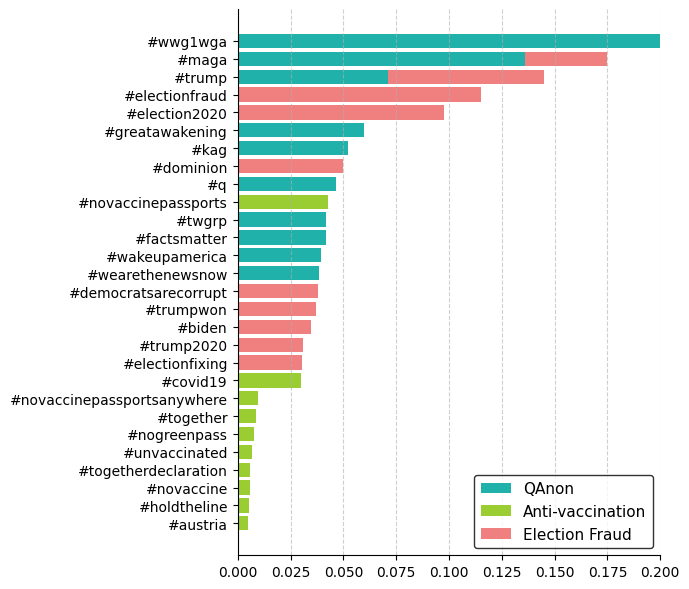

In [ ]:

plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.autolayout"] = True

ind_qa = []
fre_qa = []
#manually selected the ones that are not exactly the same as the keywords for data collection.
for item in (sorted_items_qa_ec[1:4]+sorted_items_qa_ec[6:12]+sorted_items_qa_ec[12:13]):
   ind_qa.append(item[0])
   fre_qa.append(item[1])
ind_fraud = []
fre_fraud = []
for item in (sorted_items_fraud_ec[2:12]):
   ind_fraud.append(item[0])
   fre_fraud.append(item[1])
ind_anti = []
fre_anti = []
for item in (sorted_items_anti_ec[1:7]+sorted_items_anti_ec[8:12]):
   ind_anti.append(item[0])
   fre_anti.append(item[1])

combined_frequencies = defaultdict(int)


for label, value in zip(ind_qa, fre_qa):
    combined_frequencies[label] += value
for label, value in zip(ind_anti, fre_anti):
    combined_frequencies[label] += value
for label, value in zip(ind_fraud, fre_fraud):
    combined_frequencies[label] += value


sorted_labels = sorted(combined_frequencies.keys(), key=lambda x: combined_frequencies[x], reverse=True)

left_offsets = defaultdict(int)


for label in sorted_labels:
    if label in ind_qa:
        index = ind_qa.index(label)
        plt.barh(label, fre_qa[index], color='lightseagreen', left=left_offsets[label])
        left_offsets[label] += fre_qa[index]
    if label in ind_anti:
        index = ind_anti.index(label)
        plt.barh(label, fre_anti[index], color='yellowgreen', left=left_offsets[label])
        left_offsets[label] += fre_anti[index]
    if label in ind_fraud:
        index = ind_fraud.index(label)
        plt.barh(label, fre_fraud[index], color='lightcoral', left=left_offsets[label])
        left_offsets[label] += fre_fraud[index]


plt.grid(axis='x', linestyle='--', alpha=0.6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

qa_patch = plt.Rectangle((0,0),1,1, fc="lightseagreen", edgecolor='none')
anti_patch = plt.Rectangle((0,0),1,1, fc="yellowgreen", edgecolor='none')
fraud_patch = plt.Rectangle((0,0),1,1, fc="lightcoral", edgecolor='none')
plt.legend([qa_patch, anti_patch, fraud_patch], ['QAnon', 'Anti-vaccination', 'Election Fraud'],  fontsize=11, frameon=True, edgecolor='black',loc=4)

plt.xlim(0,0.2)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

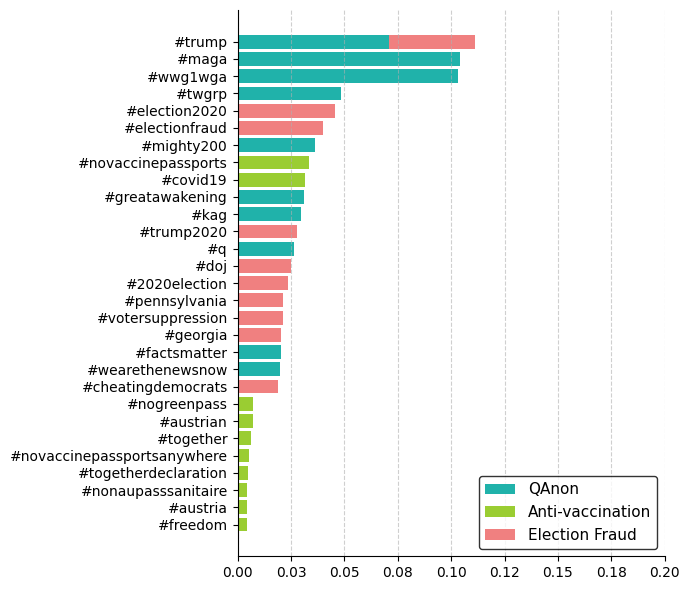

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from collections import defaultdict
plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.autolayout"] = True

ind_qa = []
fre_qa = []
for item in (sorted_items_qa_total[2:6]+sorted_items_qa_total[7:11]+sorted_items_qa_total[13:15]):
   ind_qa.append(item[0])
   fre_qa.append(item[1])
ind_fraud = []
fre_fraud = []
for item in (sorted_items_fraud_total[2:12]):
   ind_fraud.append(item[0])
   fre_fraud.append(item[1])
ind_anti = []
fre_anti = []
for item in (sorted_items_anti_total[1:6]+sorted_items_anti_total[7:12]):
   ind_anti.append(item[0])
   fre_anti.append(item[1])
combined_frequencies = defaultdict(int)

for label, value in zip(ind_qa, fre_qa):
    combined_frequencies[label] += value
for label, value in zip(ind_anti, fre_anti):
    combined_frequencies[label] += value
for label, value in zip(ind_fraud, fre_fraud):
    combined_frequencies[label] += value

sorted_labels = sorted(combined_frequencies.keys(), key=lambda x: combined_frequencies[x], reverse=True)

left_offsets = defaultdict(int)


for label in sorted_labels:
    if label in ind_qa:
        index = ind_qa.index(label)
        plt.barh(label, fre_qa[index], color='lightseagreen', left=left_offsets[label])
        left_offsets[label] += fre_qa[index]
    if label in ind_anti:
        index = ind_anti.index(label)
        plt.barh(label, fre_anti[index], color='yellowgreen', left=left_offsets[label])
        left_offsets[label] += fre_anti[index]
    if label in ind_fraud:
        index = ind_fraud.index(label)
        plt.barh(label, fre_fraud[index], color='lightcoral', left=left_offsets[label])
        left_offsets[label] += fre_fraud[index]

plt.grid(axis='x', linestyle='--', alpha=0.6)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
qa_patch = plt.Rectangle((0,0),1,1, fc="lightseagreen", edgecolor='none')
anti_patch = plt.Rectangle((0,0),1,1, fc="yellowgreen", edgecolor='none')
fraud_patch = plt.Rectangle((0,0),1,1, fc="lightcoral", edgecolor='none')
plt.legend([qa_patch, anti_patch, fraud_patch], ['QAnon', 'Anti-vaccination', 'Election Fraud'],  fontsize=11, frameon=True, edgecolor='black',loc=4)

plt.xlim(0,0.2)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
data_fraud_ec=data_fraud.loc[data_fraud['cluster']==1]


In [ ]:
data_fraud_ec.columns

Index(['cluster', 'text', 'author_id', 'interact_with', 'hashtag'], dtype='object')

In [ ]:
author_hashtag_dict = {row['author_id']: row['hashtag'] for _, row in data_fraud_ec.iterrows()}


{'769595984477380608': [], '26210888': ['#voterfraud'], '817549145884020737': ['#voterfraud', '#onepersononevote'], '1257847609466765318': ['#electoralcollege', '#voterfraud', '#bidencheated', '#trumpwon', '#krakenday', '#isthisthingon'], '1147898521879818240': ['#minnesotapublicradio', '#voterfraud'], '1019619904562098177': ['#voterfraud', '#section'], '1152439069957382144': ['#voterfraud'], '943872068117987329': ['#hr1', '#election', '#voterfraud', '#stophr1', '#nohr1', '#tcot'], '107663008': ['#voterfraudjudicialwatch'], '16925354': ['#gop', '#blackvoters', '#votes', '#voterfraud', '#fraud', '#bidenharris'], '4580297434': ['#republican', '#trump', '#vote', '#voterfraud'], '886886838': ['#voterfraud'], '1320424215309250560': ['#voterfraud'], '251497683': ['#voterfraud'], '553308886': ['#voterfraud'], '2547851682': ['#trump', '#pennsylvania', '#voterfraud', '#kag2020'], '3044233482': ['#dementia', '#voterfraud'], '2605445976': ['#censorship', '#voterfraud'], '972180115252752384': ['#v

In [ ]:
values_to_remove={'#voterfraud', '#discardedballots','#cheatingdemocrats', '#stopvoterfraud','#voterfraudbymail', '#voterfraudisreal','#ballotharvasting', '#ballotvoterfraud'}
for key in author_hashtag_dict:
    author_hashtag_dict[key] = [x for x in author_hashtag_dict[key] if x not in values_to_remove]

In [ ]:
author_hashtag_dict = {key: value for key, value in author_hashtag_dict.items() if value}

{'817549145884020737': ['#onepersononevote'], '1257847609466765318': ['#electoralcollege', '#bidencheated', '#trumpwon', '#krakenday', '#isthisthingon'], '1147898521879818240': ['#minnesotapublicradio'], '1019619904562098177': ['#section'], '943872068117987329': ['#hr1', '#election', '#stophr1', '#nohr1', '#tcot'], '107663008': ['#voterfraudjudicialwatch'], '16925354': ['#gop', '#blackvoters', '#votes', '#fraud', '#bidenharris'], '4580297434': ['#republican', '#trump', '#vote'], '2547851682': ['#trump', '#pennsylvania', '#kag2020'], '3044233482': ['#dementia'], '2605445976': ['#censorship'], '972180115252752384': ['#votes', '#scotus', '#democracy', '#election', '#election2020results', '#election2020', '#fam46'], '54910313': ['#electionday'], '1309131699272462342': ['#bullshit', '#bidencrimefamiily', '#neverpotus'], '25274570': ['#trump2020nowmorethanever', '#draintheswamp', '#georgianeedsloeffler', '#georgianeedsperdue', '#trump2020mypresdent'], '1268676562876076034': ['#venezuela', '#

In [ ]:
import networkx as nx

G = nx.Graph()

for author in author_hashtag_dict:
    G.add_node(author)

for author1 in author_hashtag_dict:
    for author2 in author_hashtag_dict:
        if author1 >= author2:
            continue

        common_hashtags = set(author_hashtag_dict[author1]) & set(author_hashtag_dict[author2])
        if common_hashtags:
            weight = len(common_hashtags)
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += weight
            else:
                G.add_edge(author1, author2, weight=weight)




In [ ]:
df = nx.to_pandas_edgelist(G)